# Computation time Analysis in Electric Vehicle Routing Example

In [1]:
import fimdpenv.nyc_parser as nyc_parser
import fimdpenv.NYCtools as NYCtools
import numpy as np
import matplotlib.pyplot as plt

from fimdp.energy_solvers import BasicES

In this notebook, we calculate the computation time for different algorithms and objectives for the problem of electic vehicle routing in the streets of New York city. For a detailed secription of the problem, have a look at the examples section [here](https://cmdp.readthedocs.io/en/latest/examples.html). In addtion to the computation time tests for different objectives, we also observe how the computation time changes with different parameters including the capacity, size of the target set, and the states comprising the target set.

NYCstreetnetwork.json contains a stochastic energy consumption model covering all the streets in central Manhattan, New York City. The reload states are all the electric charging stations in the area and the energy consumption is based on real-world data. The target states are generated randomly from the states forming the Markov decision process. In this case, we have 7378 states in the MDP and 100 randomly selected target states.

In [2]:
solverm, targets = nyc_parser.ptnetwork.json')
solver = BasicES(m, targets=targets)

We calculate the computation time for calculating the energy levels needed to reach some target within > 0 steps for scenarios when the agent capacity is equal to 30.

In [3]:
%%timeit
solver.get_minInitCons(recompute=True);

390 ms ± 5.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
solver.cap = 30
solver.get_minInitCons(recompute=True);

193 ms ± 2.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We proceed to calculate the computation time for calculating the energy levels needed to survive with a capacity of 100.

In [5]:
%%timeit
solver.cap = 100
solver.targets = targets
solver.get_safe(100, recompute=True)

1.01 s ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We also calculate the computation time taken for calculating the energy levels needed for positive reachability, almost sure reachability, and Buchi objectives for a given set of targets and a capacity of 100. We note that the time scales we obtained for the computation time on a large realistic graph are satisfactory. 

In [6]:
%%timeit
solver.get_positiveReachability(recompute=True)

1.41 s ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
solver.get_almostSureReachability(recompute=True)

2.25 s ± 62.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
solver.get_Buchi(recompute=True)

1.49 s ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now we focus on obtaining a strategy using the 'BasicES' variant for computing the safe vector. Note that the difference between computation time can vary a lot and is analyzed in different example notebooks.

In [8]:
from fimdp.energy_solvers import *

In [9]:
%%timeit
s = BasicES(m, cap=100, targets=targets)
strategy = s.get_strategy(BUCHI, recompute=True)

1.42 s ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
s = BasicES(m, cap=100, targets=targets)
strategy = s.get_strategy(AS_REACH, recompute=True)

2.16 s ± 8.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Computation time for Different Target Sets

We now analyze how the computation time varies for different target sets. The function 'timeit_difftargets()' calculates the computation time of computing the strategy with Buchi objective for 'num_samples' different randomly generated target sets. The resulting compute time is plotted as a histogram as shown below. We consider a capacity of 200 and target set size of 100 for this analysis.

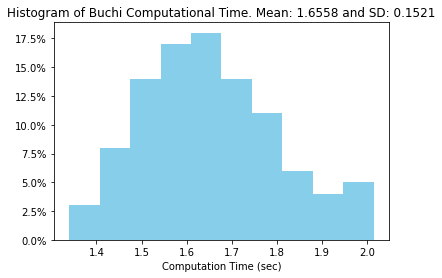

In [12]:
comptime = NYCtools.timeit_difftargets(m, cap=200, target_size = 100, num_samples=100, obj=BUCHI)
NYCtools.histogram(comptime)

We now perform the same analysis as above but with a reduced target set size, i.e., each of the randomly generated target set has only 50 states in it (instead of 100 as above). All the other parameters remain the same.

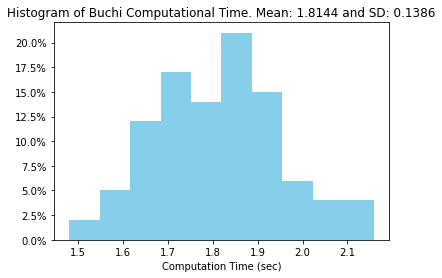

In [13]:
comptime = NYCtools.timeit_difftargets(m, cap=200, target_size = 50, num_samples=100, obj=BUCHI)
NYCtools.histogram(comptime)

### Computation Time for Different Capacities

We now analyze the variation of computation time for different capacities. The task is to generate a strategy with Buchi objective, same as the above experiments. We consider a maximum value of capacity 'cap_bound' and split the interval [0, cap_bound] into 'num_samples' no.of intervals and use the interval bounds as the different values of capacities we calculate computation time for. Further, for each capacity value, we repeat the test multiple times to account for variations in the computation time.

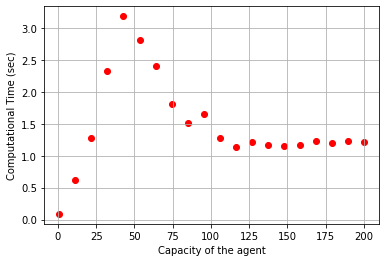

In [9]:
comptime = NYCtools.timeit_diffcaps(m, targets, cap_bound = 200, num_samples = 20, num_tests=10, obj=BUCHI)
x_val = [pair[0] for pair in comptime]; y_val = [pair[1] for pair in comptime]
plt.scatter(x_val, y_val, color='red')
plt.xlabel('Capacity of the agent'); plt.ylabel('Computation Time (sec)'); plt.grid()

### Computation Time fo Different Sizes of Target Set

Now, we analyize how the computation time changes with the size of the targets. We randomly generate target sets of different sizes and calculate the computation time for the same capacity for Buchi objective. We use a capacity of 50 and generate target sets of varying sizes in the interval [20, size_bound] and use them to evaluate the strategy and calculate the computation time. For each target set, we repeat the tests multiple times to account for variations in the computation time.

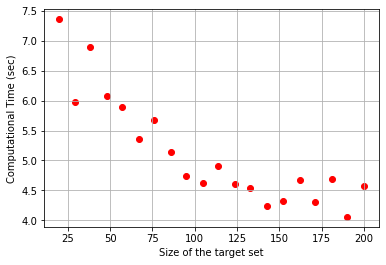

In [8]:
comptime = NYCtools.timeit_difftargetsizes(m, cap=50, size_bound = 200, num_samples = 20, num_tests=10, obj=BUCHI)
x_val = [pair[0] for pair in comptime]; y_val = [pair[1] for pair in comptime]
plt.scatter(x_val, y_val, color='red')
plt.xlabel('Size of the target set'); plt.ylabel('Computation Time (sec)'); plt.grid()